In [1]:
#load the libraries
import pandas as pd
import plotly.express as px
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
cars = pd.read_csv("Toyoto_Corrola.csv")
cars.head()

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170


In [3]:
cars.describe()

,Id,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.0,1436.000000,1436.00000
mean,721.555014,10730.824513,55.947075,68533.259749,101.502089,4.033426,4.0,5.026462,1072.45961
std,416.476890,3626.964585,18.599988,37506.448872,14.981080,0.952677,0.0,0.188510,52.64112
min,1.000000,4350.000000,1.000000,1.000000,69.000000,2.000000,4.0,3.000000,1000.00000
25%,361.750000,8450.000000,44.000000,43000.000000,90.000000,3.000000,4.0,5.000000,1040.00000
50%,721.500000,9900.000000,61.000000,63389.500000,110.000000,4.000000,4.0,5.000000,1070.00000
75%,1081.250000,11950.000000,70.000000,87020.750000,110.000000,5.000000,4.0,5.000000,1085.00000
max,1442.000000,32500.000000,80.000000,243000.000000,192.000000,5.000000,4.0,6.000000,1615.00000


In [4]:
cars.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         1436 non-null   int64 
 1   Model      1436 non-null   object
 2   Price      1436 non-null   int64 
 3   Age_08_04  1436 non-null   int64 
 4   KM         1436 non-null   int64 
 5   HP         1436 non-null   int64 
 6   Doors      1436 non-null   int64 
 7   Cylinders  1436 non-null   int64 
 8   Gears      1436 non-null   int64 
 9   Weight     1436 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 112.3+ KB


In [9]:
cars1 = cars.drop(columns=["Model","Id"])
cars1

,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,13500,23,46986,90,3,4,5,1165
1,13750,23,72937,90,3,4,5,1165
2,13950,24,41711,90,3,4,5,1165
3,14950,26,48000,90,3,4,5,1165
4,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,3,4,5,1025
1432,10845,72,19000,86,3,4,5,1015
1433,8500,71,17016,86,3,4,5,1015
1434,7250,70,16916,86,3,4,5,1015


In [12]:
cars1.rename(columns = {'Age_08_04':'Age'}, inplace = True)
cars1

,Price,Age,KM,HP,Doors,Cylinders,Gears,Weight
0,13500,23,46986,90,3,4,5,1165
1,13750,23,72937,90,3,4,5,1165
2,13950,24,41711,90,3,4,5,1165
3,14950,26,48000,90,3,4,5,1165
4,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,3,4,5,1025
1432,10845,72,19000,86,3,4,5,1015
1433,8500,71,17016,86,3,4,5,1015
1434,7250,70,16916,86,3,4,5,1015


In [13]:
cars1.isna().sum()

Price        0
Age          0
KM           0
HP           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [15]:
cars1[cars1.duplicated(keep=False)]

,Price,Age,KM,HP,Doors,Cylinders,Gears,Weight
112,24950,8,13253,116,5,4,5,1320
113,24950,8,13253,116,5,4,5,1320


#### Observations
- THERE ARE NO NULL VALUES
- THERE ARE DUPLICATED ROW WITH INDEX 112 AND 113
- THE CONTINUOUS VARIABLE COLUMNS: PRICE,AGE,KM,HP AND WEIGHT
- THE CATEGORICAL COLUMNS ARE DOORS, CYLINDERS AND GEAR
- THE PRICE COLUMN IS THE PREDICTED(Y) VARIABLE

In [21]:
cars1.drop_duplicates(keep = 'first', inplace = True)
cars1.reset_index(drop=True)
cars1

,Price,Age,KM,HP,Doors,Cylinders,Gears,Weight
0,13500,23,46986,90,3,4,5,1165
1,13750,23,72937,90,3,4,5,1165
2,13950,24,41711,90,3,4,5,1165
3,14950,26,48000,90,3,4,5,1165
4,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,3,4,5,1025
1432,10845,72,19000,86,3,4,5,1015
1433,8500,71,17016,86,3,4,5,1015
1434,7250,70,16916,86,3,4,5,1015


[array([18600, 21500, 20950, 19950, 19600, 21500, 22500, 22000, 22750,
        17950, 17495, 17950, 19000, 17950, 17950, 21950, 17950, 20500,
        21950, 18950, 18750, 17950, 17950, 18950, 22250, 18950, 19950,
        18750, 18450, 18950, 17250, 17950, 17450, 17950, 21950, 22250,
        19950, 18900, 19950, 18750, 17450, 18990, 18500, 18500, 19450,
        18800, 17450, 17950, 32500, 31000, 31275, 24950, 22950, 24990,
        21950, 17900, 19250, 22250, 18950, 19950, 18950, 21750, 17950,
        18450, 23000, 19900, 23950, 19950, 18500, 18950, 20500, 24500,
        19450, 20950, 19950, 18450, 19500, 21750, 19500, 18900, 19750,
        19750, 18950, 20750, 19600, 19500, 17650, 19950, 19950, 20950,
        20500, 17795, 18245, 23750, 19500, 18950, 21950, 19950, 18950,
        19950, 21950, 22500, 18500, 18700, 21125, 21500, 17795, 18245,
        18950], dtype=int64)]

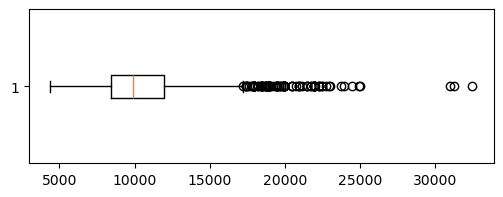

In [22]:
plt.figure(figsize=(6,2))
boxplot_data = plt.boxplot(cars1["Price"], vert=False)
[item.get_xdata() for item in boxplot_data['fliers']]

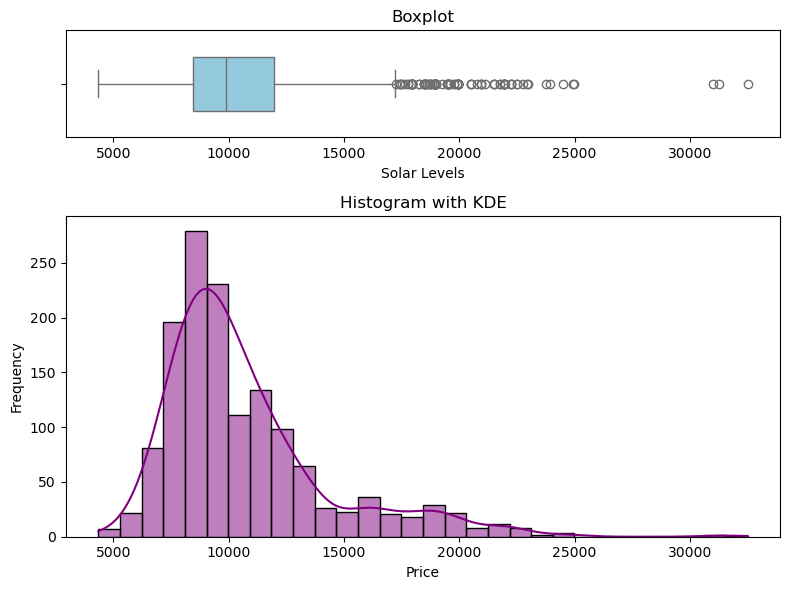

In [26]:
# Create a figure with two subplots, stacked vertically
fig, axes = plt. subplots(2, 1, figsize=(8, 6), gridspec_kw={ 'height_ratios': [1, 3]})
# Plot the boxplot in the first (top) subplot
sns. boxplot(cars1["Price"], ax=axes[0], color='skyblue', width=0.5, orient = 'h')
axes [0].set_title("Boxplot")
axes[0].set_xlabel("Solar Levels")
# Plot the histogram with KDE curve in the second (bottom) subplot
sns.histplot(cars1["Price"], kde=True, ax=axes [1], color='purple', bins=30)
axes [1].set_title("Histogram with KDE")
axes [1].set_xlabel("Price")
axes [1].set_ylabel("Frequency")
plt.tight_layout()
plt.show()